We're interested in a mirror that is reflective in the mid-IR (reflective
band centered 1550 - 2200 cm-1 depending on exact system, with reflectivity
band width of ~200 cm-1 or more) and as transmissive as possible in the
upper visible (roughly from 320-700 nm, but we could settle for a smaller
range).

There are quite a few materials at our disposal either in-house or through a
vendor.  I could list them all but I suppose we could start with the most
common.
Ag
Si3N4
SiO2
TiO2
Al2O3
Ta2O5
ZrO2

*from Michael*


I also think it could be desirable if the near-UV to visible is transparent, the mid-IR from ~4000 cm^-1 to 500 cm^-1 is completely reflective,

*from Blake* 
While it is true that the width of the reflective region in the mid-IR would "ideally" be somewhat narrow (this would remove unintended couplings), I'd say that is a secondary concern.  Broadly speaking, we're not too concerned about what happens between ~2200cm-1 and 700nm.


$$ nd=\frac{\lambda}{4} \rightarrow d = \frac{\lambda}{4n}$$

In [1]:
import wptherml
from matplotlib import pyplot as plt
import numpy as np
_possible_materials = ["SiO2", "Al2O3", "TiO2", "Ag", "Au", "Ta2O5"]


In [2]:
def is_dominated(eta, rho):
    '''Pareto optimal: structure x with useful power density \rho(x) and
       spectral efficiency \eta(x) is pareto optimal if for all y \neq x
       \rho(x) ≥ \rho(y) and \eta(x) ≥ \eta(y)
       and \rho(x) > \rho(y) or \eta(x) > \eta(y)'''
    _N = len(eta)
    _is_dominated = []
    for i in range(0, _N):
        _rho_x = rho[i]
        _eta_x = eta[i]
        for j in range(0, _N):
            if j != i:
                _rho_y = rho[j]
                _eta_y = eta[j]
                if _rho_y >= _rho_x and _eta_y >= _eta_x:
                    if _rho_y > _rho_x or _eta_y > _eta_x:
                        _is_dominated.append(i)
                        break
    return _is_dominated
             
    

In [3]:
test_args = {
    "wavelength_list": [300e-9, 6000e-9, 1000],
    "Material_List": ["Air","ta2o5", "SiO2", "Al2O3", "SiO2", "Al2O3", "Ag", "Air"],
    "Thickness_List": [0, 70e-9, 85e-9, 70e-9, 85e-9, 500e-9, 5e-9, 0],
    "reflective_window_wn" : [2000, 2400],
    "transmissive_window_nm" : [350, 700],
    "random_material_layers" : [1, 2, 3, 4, 5],
    "random_thickness_layers" : [1, 2, 3, 4, 5],
    "possible_random_materials" : ["SiO2", "Al2O3", "Ta2O5", "TiO2"]
 }

In [4]:
sf = wptherml.SpectrumFactory()
test = sf.spectrum_factory('Tmm', test_args)


 Your spectra have been computed! 😎 


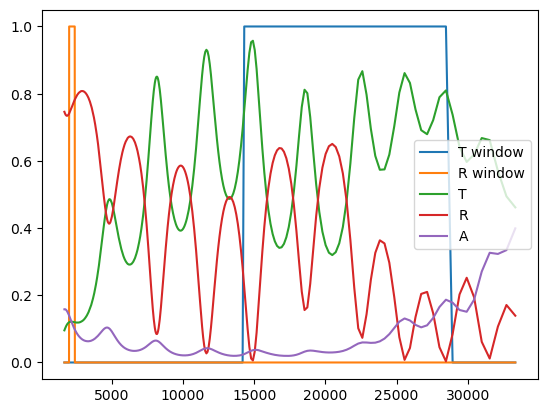

In [5]:
#te = _compute_transmission_envelope(test.wavelength_array)
#re = _compute_reflection_envelope(test.wavelength_array, 2200, 200)


plt.plot(test.wavenumber_array * 1e-2, test.transmissive_envelope, label='T window')
plt.plot(test.wavenumber_array * 1e-2, test.reflective_envelope, label='R window')
plt.plot(test.wavenumber_array * 1e-2, test.transmissivity_array, label='T')
plt.plot(test.wavenumber_array * 1e-2, test.reflectivity_array, label='R')
plt.plot(test.wavenumber_array * 1e-2, test.emissivity_array, label='A')
plt.legend()

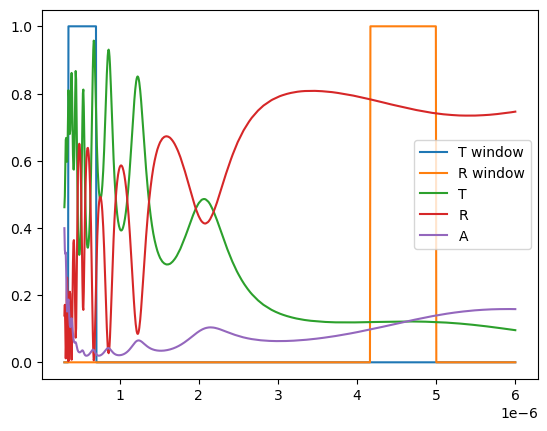

In [6]:
plt.plot(test.wavelength_array, test.transmissive_envelope, label='T window')
plt.plot(test.wavelength_array, test.reflective_envelope, label='R window')
plt.plot(test.wavelength_array, test.transmissivity_array, label='T')
plt.plot(test.wavelength_array, test.reflectivity_array, label='R')
plt.plot(test.wavelength_array, test.emissivity_array, label='A')
plt.legend()


#plt.xlim(1000, 3000)

In [23]:


N = 500
M = len(test.random_materials_list)
foms = np.zeros((N, 2))
thicknesses = np.zeros((N, test.number_of_layers))
materials_codes = np.zeros((N, M), dtype=int)

for i in range(0, N):
    test.randomize_materials_array()
    test.randomize_thickness_array()
    thicknesses[i,:] = np.copy(test.thickness_array)
    materials_codes[i,:] = np.copy(test.materials_code)
    test.compute_spectrum()
    test.compute_selective_mirror_fom()
    # take the complement of the objective to analyze the Pareto dominant solutions
    foms[i,0] = 1-test.mean_scaled_squared_reflectivity_error
    foms[i,1] = 1-test.mean_scaled_squared_transmissivity_error



In [15]:
print(thicknesses)
print(materials_codes)


[[0.00e+00 7.76e-07 1.13e-07 6.43e-07 9.84e-07 6.56e-07 5.00e-09 0.00e+00]
 [0.00e+00 6.25e-07 6.50e-08 8.12e-07 3.93e-07 1.28e-07 5.00e-09 0.00e+00]
 [0.00e+00 8.82e-07 9.17e-07 4.39e-07 4.72e-07 2.85e-07 5.00e-09 0.00e+00]
 [0.00e+00 3.00e-09 9.14e-07 9.46e-07 8.34e-07 9.78e-07 5.00e-09 0.00e+00]
 [0.00e+00 9.72e-07 9.78e-07 9.60e-07 3.61e-07 2.41e-07 5.00e-09 0.00e+00]
 [0.00e+00 6.12e-07 1.76e-07 5.30e-08 2.30e-07 8.39e-07 5.00e-09 0.00e+00]
 [0.00e+00 8.89e-07 1.70e-07 8.92e-07 7.39e-07 5.16e-07 5.00e-09 0.00e+00]
 [0.00e+00 9.28e-07 7.80e-08 3.05e-07 7.21e-07 8.05e-07 5.00e-09 0.00e+00]
 [0.00e+00 2.33e-07 5.29e-07 6.50e-07 9.59e-07 2.80e-08 5.00e-09 0.00e+00]
 [0.00e+00 8.00e-07 6.20e-08 5.81e-07 7.13e-07 8.91e-07 5.00e-09 0.00e+00]]
[[1 0 2 1 0]
 [0 3 2 2 0]
 [1 1 1 0 3]
 [3 1 0 0 2]
 [3 1 1 1 2]
 [0 1 3 0 2]
 [0 0 2 1 3]
 [2 3 0 2 3]
 [0 2 0 1 1]
 [3 2 3 0 3]]


In [24]:
# get the indices of all solutions that are dominated by at least 1 other solution
dominated_indices = is_dominated(foms[:,0], foms[:,1])

# collect the Pareto front as the solutions which are *NOT* dominated by any others
pareto_foms = np.delete(foms, dominated_indices, axis=0)
pareto_materials = np.delete(materials_codes, dominated_indices, axis=0)
pareto_thicknesses = np.delete(thicknesses, dominated_indices, axis=0)


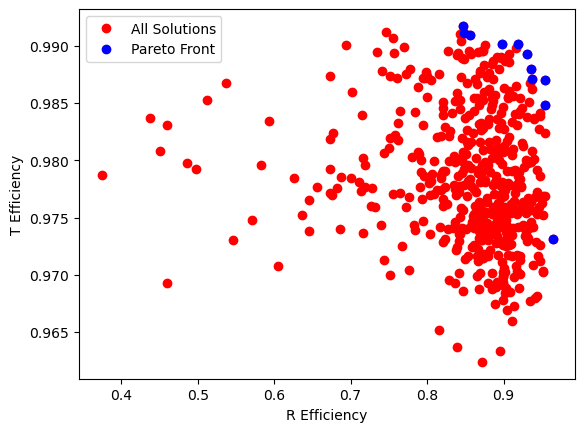

In [26]:
plt.plot(foms[:,0], foms[:,1], 'ro', label="All Solutions")
plt.plot(pareto_foms[:,0],  pareto_foms[:,1], 'bo', label="Pareto Front")
plt.xlabel("R Efficiency")
plt.ylabel("T Efficiency")
plt.legend()
plt.show()

Let's plot the spectrum of the Pareto optimal solution that has the maximum R efficiency

In [27]:
# get the index of the solution with the largest value of \eta
max_R_index = np.argmax(pareto_foms[:,0])
print(max_R_index)
max_T_index = np.argmax(pareto_foms[:,1])
print(max_T_index)

7
4


We can easily get the thickness list for each of these solutions, but the materials list is
going to take slightly more work... we have the material codes (indices) and must use them along
with the `possible_materials` and `random_materials_list` attributes 

In [36]:
# get the thickness array for the Pareto solution that maximizes R efficiency / minimizes R error
test.thickness_array = np.copy(pareto_thicknesses[max_T_index])

In [37]:
print(test.material_array)
for i in range(len(pareto_materials[max_T_index])):
    idx = pareto_materials[max_T_index, i]
    mat_str = test.possible_materials[idx]
    jdx = test.random_materials_list[i]
    print(jdx)
    print(mat_str)
    test.material_array[jdx] = mat_str
print(test.material_array)

['Air', 'Ta2O5', 'SiO2', 'SiO2', 'TiO2', 'Ta2O5', 'Ag', 'Air']
1
Al2O3
2
Al2O3
3
TiO2
4
Al2O3
5
SiO2
['Air', 'Al2O3', 'Al2O3', 'TiO2', 'Al2O3', 'SiO2', 'Ag', 'Air']


In [38]:
print(test.thickness_array)

[0.00e+00 3.86e-07 4.93e-07 7.44e-07 5.40e-08 4.40e-08 5.00e-09 0.00e+00]


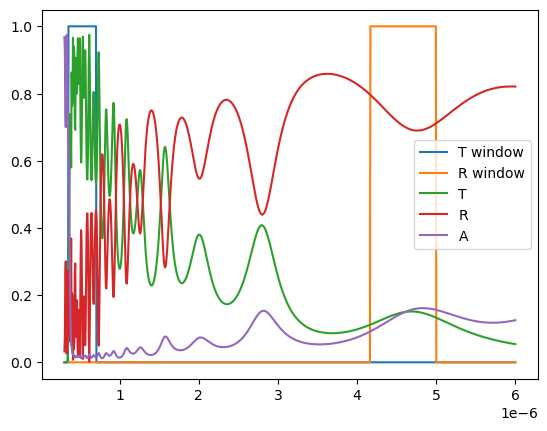

In [39]:
test.set_refractive_index_array()
test.compute_spectrum()

plt.plot(test.wavelength_array, test.transmissive_envelope, label='T window')
plt.plot(test.wavelength_array, test.reflective_envelope, label='R window')
plt.plot(test.wavelength_array, test.transmissivity_array, label='T')
plt.plot(test.wavelength_array, test.reflectivity_array, label='R')
plt.plot(test.wavelength_array, test.emissivity_array, label='A')
plt.legend()


In [ ]:
from scipy.optimize import minimize
from scipy.optimize import basinhopping
import time

test_args = {
    "wavelength_list": [300e-9, 6000e-9, 1000],
    "Material_List": ["Air","Al2O3", "SiO2", "Al2O3", "SiO2", "Al2O3", "Ag", "Air"],
    "Thickness_List": [0, 409e-9,  55e-9, 322e-9, 494e-9,  97e-9,   5e-9, 0],
}

# start the spectrum driver
sf = wptherml.SpectrumFactory()
# create an instance using the TMM with the structure defined as above
test = sf.spectrum_factory('Tmm', test_args)

def update_multilayer(x):
    """ function to update the thicknesses of each layer given an
        array of thicknesses stored in x"""
    
    rfom, tfom = figure_of_merit(test, x, 2200, 200)
    comp_fom = 0.5 * (rfom + tfom)

    ### return negative of cooling power - minimize functions want 
    ### to minimize, so trick them by passing negative of the objective you
    ### want to maximize
    return -comp_fom

### given an array of thicknesses of the coating, update
### the structure and compute the gradient vector of conversion efficiency wrt layer thicknesses
#def analytic_grad(x0):
#    cur = update_multilayer(x0)
#    cool_ml.compute_cooling_gradient()
#
#    g = cool_ml.net_cooling_power_gradient
#    ### scale gradient to be in nm^-1 rather than over m^-1
#    return -g*1e-9

### Function that gets the negative of the efficiency and the 
### negative of the gradient for use in the l-bfgs-b algorithm
### also prints out the time for timing purposes!
def SuperFunc(x0):
    en = update_multilayer(x0)
    #c_time = time.time()
    #if en<0:
    #    print(" This structure is net cooling with net power out being",-en)
    #else:
    #    print(" This structure is net warming with net poer in being",-en)
    #gr = analytic_grad(x0)
    return en

# the bounds for L-BFGS-B updates!
# minimum layer thickness is 1 nm
bfgs_xmin = np.ones(test.number_of_layers-2)
# maximum layer thickness is 400 nm
bfgs_xmax = 400*np.ones(test.number_of_layers-2)

# rewrite the bounds in the way required by L-BFGS-B
bfgs_bounds = [(low, high) for low, high in zip(bfgs_xmin, bfgs_xmax)]

### initialize the solution vector xs to be the thicknesses from 
### Raman et al. paper
xs = np.array([409,  55, 322, 494,  97,   5])
### print out initial solution vector and initial efficiency
print("xs is ")
print(xs)
pflux = -update_multilayer(xs)
if pflux>0:
    print(" This structure is net cooling with net power out being",pflux)   
else:
    print(" This structure is net warming with net poer in being",pflux)


### run l-bfgs-b algorithm!
ret = minimize(SuperFunc, xs, method="L-BFGS-B", jac=False, bounds=bfgs_bounds)

### print optimal solution and its efficiency!
print(ret.x)
print(-update_multilayer(ret.x))

In [ ]:
rfom, tfom = figure_of_merit(test, ret.x, 2200, 200)
print(rfom, tfom)

In [ ]:
N_layer = 3
lists = np.linspace(1, N_layer, N_layer, dtype=int)
print(lists)